# Titanic Survival Prediction from Scratch using NumPy

This notebook implements a binary classification model to predict passenger survival on the Titanic, using only NumPy (no ML libraries). It includes data cleaning, EDA, model training with gradient descent, and loss visualization.

**Goal:** Understand core concepts like feature normalization, binary cross-entropy loss, gradient descent, and sigmoid activation—by building everything manually.

## Dataset Overview

The dataset contains 891 rows with 12 columns. Key features include:
- `Pclass`: Ticket class (1st, 2nd, 3rd)
- `Sex`, `Age`, `SibSp`, `Parch`: Personal details
- `Fare`: Ticket fare
- `Embarked`: Port of embarkation

Target variable: `Survived` (1 = survived, 0 = did not survive)

In [138]:
import pandas as pd

df = pd.read_csv('./titanic_ml_project/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [140]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [141]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [142]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [143]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## Data Cleaning

We drop irrelevant columns, fill missing values, and encode categorical features to prepare the dataset for numerical modeling.

In [144]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

In [145]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [146]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [147]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [148]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [149]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int64(6)
memory usage: 57.6 KB


In [151]:
print(type(X))
print(X.dtype)

<class 'numpy.ndarray'>
float64


In [152]:
X = df[features].values

In [119]:
#X = df[features].astype(np.float64).values

In [120]:
#X = (X - X.mean(axis=0)) / X.std(axis=0)

In [121]:
#X = df[features].astype(np.float64).to_numpy()

In [122]:
#X = (X - X.mean(axis=0)) / X.std(axis=0)

In [153]:
X = df[features].astype(np.float64).values

In [154]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [155]:
import numpy as np

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S']

# Force all feature values to be float64
X = df[features].apply(pd.to_numeric, errors='coerce').astype(np.float64).to_numpy()

# Target variable
y = df['Survived'].astype(np.float64).values.reshape(-1, 1)

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [156]:
np.random.seed(42)  # For consistent results
m, n = X.shape      # m = samples, n = features

# Randomly initialize weights and bias
W = np.random.randn(n, 1)
b = 0

## Model: Logistic Regression (Custom)

We implement logistic regression manually using:
- **Sigmoid activation** for probability output
- **Binary cross-entropy loss** for classification cost
- **Gradient descent** to update weights

In [157]:
# Sigmoid activation for binary classification
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary cross-entropy loss
def compute_loss(y, y_hat):
    epsilon = 1e-9  # To prevent log(0)
    return -np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))

In [158]:
def gradient_descent(X, y, W, b, lr, epochs):
    losses = []
    for i in range(epochs):
        z = np.dot(X, W) + b
        y_hat = sigmoid(z)
        loss = compute_loss(y, y_hat)
        losses.append(loss)

        # Calculate gradients
        dw = np.dot(X.T, (y_hat - y)) / m
        db = np.mean(y_hat - y)

        # Update weights
        W -= lr * dw
        b -= lr * db

        # Print progress every 100 iterations
        if i % 100 == 0:
            print(f"Epoch {i} ➤ Loss: {loss:.4f}")

    return W, b, losses

In [134]:
W_trained, b_trained, losses = gradient_descent(X, y, W, b, lr=0.1, epochs=1000)

Epoch 0 ➤ Loss: 0.9857
Epoch 100 ➤ Loss: 0.5121
Epoch 200 ➤ Loss: 0.4701
Epoch 300 ➤ Loss: 0.4558
Epoch 400 ➤ Loss: 0.4486
Epoch 500 ➤ Loss: 0.4447
Epoch 600 ➤ Loss: 0.4426
Epoch 700 ➤ Loss: 0.4416
Epoch 800 ➤ Loss: 0.4411
Epoch 900 ➤ Loss: 0.4409


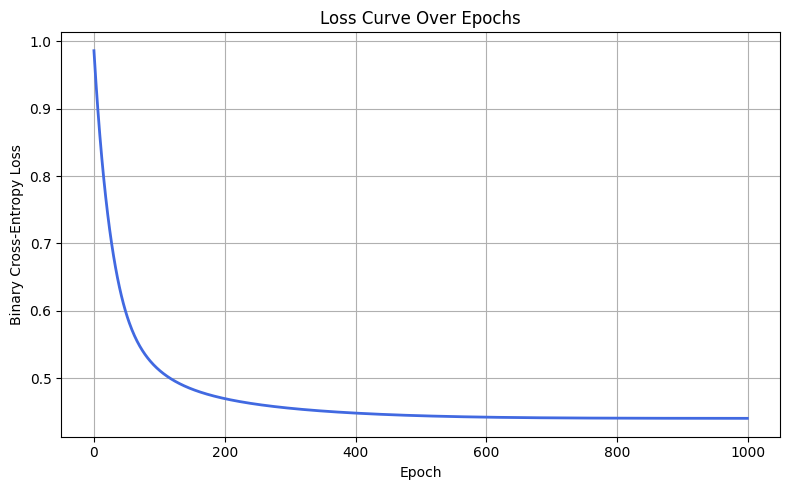

In [159]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(losses, color='royalblue', linewidth=2)
plt.title('Loss Curve Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

In [160]:
# Predict probabilities using sigmoid
z = np.dot(X, W_trained) + b_trained
y_pred_prob = sigmoid(z)

# Convert to binary predictions (1 = survived, 0 = did not survive)
y_pred = (y_pred_prob > 0.5).astype(int)


In [161]:
accuracy = np.mean(y_pred == y)
print(f"Model accuracy on training data: {accuracy:.4f}")


Model accuracy on training data: 0.7980


## Results

- Final training accuracy: **79.80%**
- This baseline model uses simple features and no external ML libraries.
- Future work: Add train/test split and compare with scikit-learn models.

---

## Key Takeaways
- Built from scratch with NumPy
- Learned practical foundations of ML workflow
- Visualized training progress with loss curve
